 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [169]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import csv
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [170]:
# Reading whale returns
csv_path = Path("./Resources/whale_returns.csv/")
whale_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_data.sort_index(ascending = True, inplace = True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [171]:
# Count nulls
whale_data.isnull().mean()*100
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [172]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.isnull().sum()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [173]:
# Reading algorithmic returns
csv_path = Path("./Resources/algo_returns.csv/")
algo_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_data.sort_index(ascending = True, inplace = True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [174]:
# Count nulls
algo_data.isnull().mean()*100
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [175]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [176]:
# Reading S&P 500 Closing Prices
csv_path = Path("./Resources/sp500_history.csv/")
sp500_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [177]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [179]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype("float")
sp500_df.sort_index(inplace=True)
sp500_df

<ipython-input-179-4b7159ed1f9c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [180]:
# Calculate Daily Returns
sp_daily_returns = sp500_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [181]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [182]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.rename(columns={"Close": "SP500"}, inplace=True)
sp_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [183]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_rows = pd.concat([whale_data, algo_data, sp_daily_returns], axis = "columns", join = "inner")
joined_rows
#sp500_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

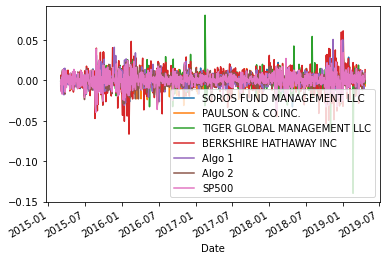

In [184]:
# Plot daily returns of all portfolios
joined_rows.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

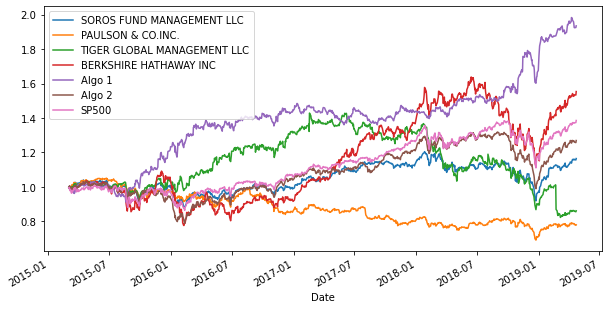

In [185]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+joined_rows).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

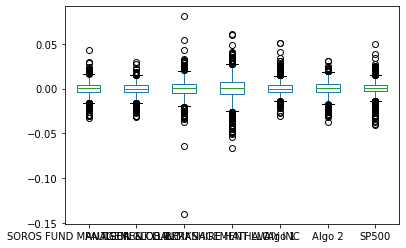

In [186]:
# Box plot to visually show risk
joined_rows.plot.box()

### Calculate Standard Deviations

In [187]:
# Calculate the daily standard deviations of all portfolios
portfolios_daily_std = pd.DataFrame(joined_rows.std()).rename(columns = {0 : "Standard Deviation"})
portfolios_daily_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [62]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_df.std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
for risk in portfolios_daily_std["Standard Deviation"]:
    if risk > portfolios_daily_std.loc["SP500", "Standard Deviation"]:
        print("The Highest risk is", (round(risk,6)))

The Highest risk is 0.010894
The Highest risk is 0.012919


### Calculate the Annualized Standard Deviation

In [188]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolios_daily_std*np.sqrt(252)
annualized_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

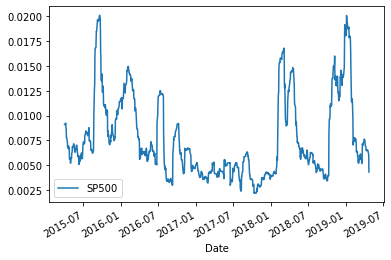

In [189]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_joined_rows = joined_rows[["SP500"]].rolling(window=21).std()
# Plot the rolling standard deviation
rolling_joined_rows.plot()

### Calculate and plot the correlation

<AxesSubplot:xlabel='Algo 2', ylabel='SP500'>

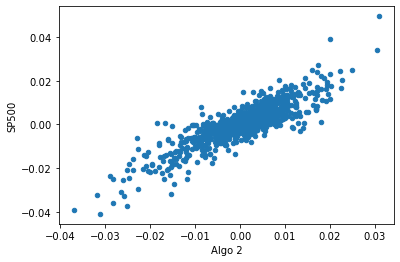

In [190]:
# Calculate the correlation
correlation_calculation = joined_rows.corr()
# Display de correlation matrix
joined_rows.plot(kind="scatter", x = "Algo 2", y = "SP500")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

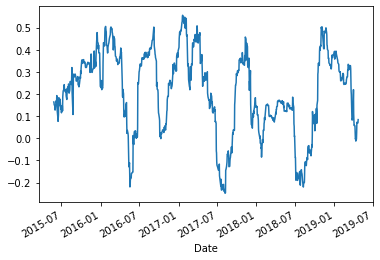

In [191]:
# Calculate covariance of a single portfolio
covariance = joined_rows["Algo 1"].cov(joined_rows["SP500"])
covariance
# Calculate variance of S&P 500
variance = joined_rows["Algo 1"].var()
variance
# Computing beta
beta = covariance/variance
rolling_covariance = joined_rows["Algo 1"].rolling(window=60).cov(joined_rows["SP500"])
rolling_variance =  joined_rows["SP500"].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
#beta
# Plot beta trend
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

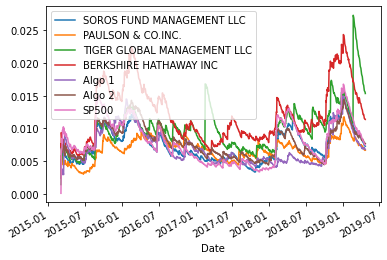

In [192]:
# Use `ewm` to calculate the rolling window
joined_rows.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [193]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_rows.mean()*252)/(joined_rows.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:>

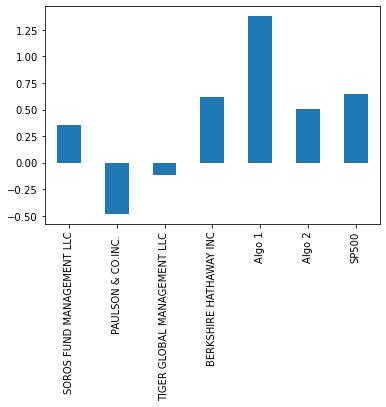

In [194]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [274]:
# Reading data from 1st stock
csv_path = Path("./Resources/goog_historical.csv/")
goog_data = pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_data.sort_index(ascending = True, inplace = True)
goog_data.rename(columns={"NOCP":"GOOG"}, inplace=True)
goog_data.drop(columns="Symbol", inplace=True)
goog_data.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [273]:
# Reading data from 2nd stock
csv_path = Path("./Resources/aapl_historical.csv/")
aapl_data = pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_data.sort_index(ascending = True, inplace = True)
aapl_data.rename(columns={"NOCP":"AAPL"}, inplace=True)
aapl_data.drop(columns="Symbol", inplace=True)
aapl_data.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [272]:
# Reading data from 3rd stock
csv_path = Path("./Resources/cost_historical.csv/")
cost_data = pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_data.sort_index(ascending = True, inplace = True)
cost_data.rename(columns={"NOCP":"COST"}, inplace=True)
cost_data.drop(columns="Symbol",inplace=True)
cost_data.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [275]:
# Combine all stocks in a single DataFrame
joined_rows_two = pd.concat([goog_data, aapl_data, cost_data], axis = "columns", join = "inner")
joined_rows_two.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [276]:
# Reset Date index
joined_rows_two.reset_index(["Trade DATE"])

,Trade DATE,GOOG,AAPL,COST
0,2018-05-11,1098.26,188.59,195.76
1,2018-05-14,1100.20,188.15,195.88
2,2018-05-15,1079.23,186.44,195.48
3,2018-05-16,1081.77,188.18,198.71
4,2018-05-17,1078.59,186.99,199.60
...,...,...,...,...
245,2019-05-03,1185.40,211.75,244.62
246,2019-05-06,1189.39,208.48,244.23
247,2019-05-07,1174.10,202.86,240.18
248,2019-05-08,1166.27,202.90,241.34


In [277]:
# Reorganize portfolio data by having a column per symbol
### REFER BACK TO TOP - I PERSONALLY FOUND THIS THE MOST DIFFICULT PART

In [280]:
# Calculate daily returns
daily_returns_two = joined_rows_two.pct_change()
# Drop NAs
daily_returns_two.dropna(inplace=True)
#daily_returns_two.dropna(inplace=True)
# Display sample data
daily_returns_two

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [297]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolios_returns = daily_returns_two.dot(weights)
# Display sample data

portfolios_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [306]:
# Join your returns DataFrame to the original returns DataFrame
returns = pd.concat((portfolios_returns, joined_rows), axis = 1, join = "inner")
returns.rename(columns={0:"Latest_Portfolio"}, inplace=True)
returns

,Latest_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [324]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns.std()
returns_std = pd.DataFrame(returns.std()).rename(columns = {0 : "Standard Deviation"})
returns_std

,Standard Deviation
Latest_Portfolio,0.013323
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
SP500,0.009578


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [325]:
# Calculate the annualized `std`
annualized_std = returns_std * np.sqrt(252)
annualized_std.head()
for risk in returns_std["Standard Deviation"]:
    if risk > returns_std.loc["SP500", "Standard Deviation"]:
        print("The Highest risk is", (round(risk,6)))


The Highest risk is 0.013323
The Highest risk is 0.014648
The Highest risk is 0.015569


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

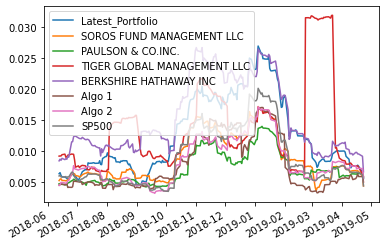

In [338]:
# Calculate rolling standard deviation
rolling_returns = returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_returns.plot()

### Calculate and plot the correlation

,Latest_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Latest_Portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
SP500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


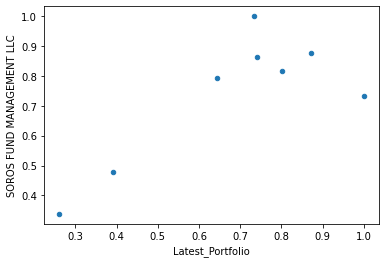

In [344]:
# Calculate and plot the correlation
returns_correlation = returns.corr()
returns_correlation.plot(kind = "scatter", x = "Latest_Portfolio", y = "SOROS FUND MANAGEMENT LLC")
returns_correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

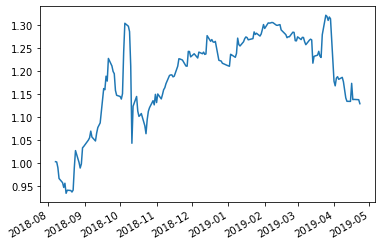

In [349]:
# Calculate and plot Beta
rolling_variance_two = returns["SP500"].rolling(window=60).var()
rolling_covariance_two = returns["Latest_Portfolio"].rolling(window=60).cov(returns["SP500"])
rolling_beta_two = rolling_covariance_two/rolling_variance_two
rolling_beta_two.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [332]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_two = (returns.mean()* 252) / ((returns).std() * np.sqrt(252))
sharpe_ratios_two

Latest_Portfolio               0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
dtype: float64

<AxesSubplot:title={'center':'Final Sharpe Ratios'}>

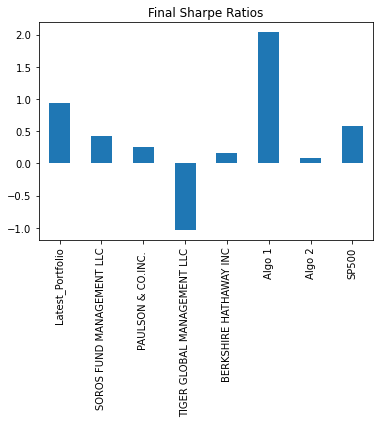

In [334]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_two.plot(kind="bar", title = "Final Sharpe Ratios")